# Data structuring

In [1]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load df from disk

df = pd.read_csv("speeches/data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat


In [4]:
len(df)

108

In [3]:
df["Speech"] = df["Speech"].str.replace("transcript-inner", "").str.replace(u'\xa0', u' ')

In [5]:
print(df['Speech'].loc[9])


      
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more consequential 

In [9]:
# drops party orientation that isn't Rep or Dem
df2 = df.drop(df.index[92:108])

In [10]:
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat


In [11]:
# creates party dummy
Party_dummy = pd.get_dummies(df2['Party'], drop_first=True)
# Party_dummy

In [12]:
df2['Republican'] = Party_dummy

In [13]:
df2.head()
print(len(df2))

92


In [14]:
#Number of words in each speech
df2["word_count"] = df2["Speech"].apply(lambda x : len(x))
#Number of unique words in each speech
df2["unique_word"] = df2["Speech"].apply(lambda x : len(set(x.lower().split()) ) )
#Number of unique words ratio in each speech
df2["unique_word_ratio"] = df2.apply(lambda x : x["unique_word"]/x["word_count"] ,axis=1)
#Extracting year alone from the Date column
df2["year"] = df2["Date"].apply(lambda x : int(x.split(",")[2])  if len(x.split(","))==3 else int(x.split(",")[1]) )
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30686,1909,0.062211,2019
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican,1,30237,1905,0.063002,2018
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican,1,8399,621,0.073937,2017
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,35236,1930,0.054774,2016
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,40282,2067,0.051313,2015


In [15]:
print(df2['Party'])

0     Republican
1     Republican
2     Republican
3       Democrat
4       Democrat
5       Democrat
6       Democrat
7       Democrat
8       Democrat
9       Democrat
10      Democrat
11      Democrat
12    Republican
13    Republican
14    Republican
15    Republican
16    Republican
17    Republican
18    Republican
19    Republican
20    Republican
21      Democrat
22      Democrat
23      Democrat
24      Democrat
25      Democrat
26      Democrat
27      Democrat
28    Republican
29    Republican
         ...    
62      Democrat
63      Democrat
64      Democrat
65      Democrat
66      Democrat
67      Democrat
68    Republican
69    Republican
70    Republican
71    Republican
72    Republican
73    Republican
74    Republican
75      Democrat
76      Democrat
77    Republican
78    Republican
79    Republican
80    Republican
81      Democrat
82    Republican
83      Democrat
84    Republican
85    Republican
86    Republican
87    Republican
88    Republican
89    Republic

In [ ]:
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Republican', data=df2)
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

In [16]:
max(df2['word_count'])
min(df2['word_count'])

3005

In [ ]:
# Trying to make to new dataframes; one with InAug speeches and one 
# with State.

df_inaug = []
df_state = []

for speech in df2['Type']:
    if 'Type'=='Inaugural Address':
        df_inaug.append
    else:
        df_state.append


#df_by_speech = df2.groupby('Type').head()

df_inaug = [g for _, g in df2.groupby('Type'=='Inaugural Address')]
df_state = [g for _, g in df2.groupby('Type'=='State of the Union')]

In [ ]:
df_inaug = df_by_speech['Type'=='Inaugural Adress']
df_inaug
print(len(df_inaug))
df_state = df_by_speech['Type'=='State of the Union']
print(len(df_state))

In [17]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

In [18]:
df_speech_des.head()

Unnamed: 0                                               \
                        count       mean        std  min   25%   50%   75%   
Type                                                                         
Inaugural Address        39.0  62.564103  25.204213  2.0  51.0  72.0  81.5   
State of the Union       53.0  32.943396  20.110670  0.0  17.0  32.0  48.0   

                         Republican            ... unique_word_ratio  \
                     max      count      mean  ...               75%   
Type                                           ...                     
Inaugural Address   91.0       39.0  0.589744  ...          0.074792   
State of the Union  71.0       53.0  0.566038  ...          0.058494   

                              year                                          \
                         max count         mean        std     min     25%   
Type                                                                         
Inaugural Address   0.093575  39.0  1931.358974  48.806539  1853.0  1891.0   
State of the Union  0.067805  53.0  1985.962264  23.333669  1929.0  1974.0   

                                            
                       50%     75%     max  
Type                                        
Inaugural Address   1929.0  1971.0  2017.0  
State of the Union  1988.0  2004.0  2019.0  

[2 rows x 48 columns]

In [19]:
df_speech_des['word_count']
with open('mytable.tex','w') as tf:
    tf.write(df_by_speech.to_latex())

NameError: name 'df_by_speech' is not defined

Text(-8.700000000000003, 0.5, '')

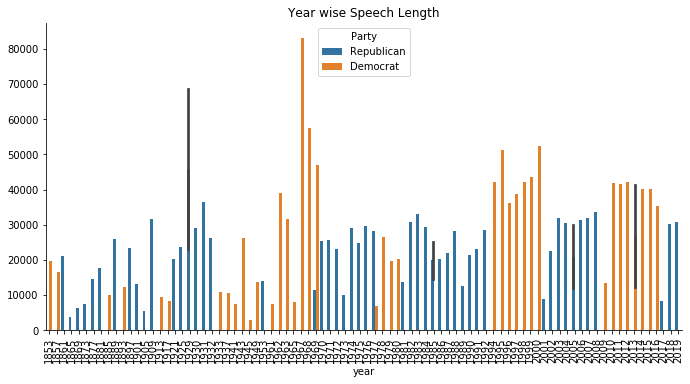

In [20]:
timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df2,kind="bar",height=5,aspect=2,legend_out=False)
timeline.set_xticklabels(rotation=90)
plt.title("Year wise Speech Length")
plt.ylabel("")

# Text analysis

In [21]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


In [22]:
# initialize tokenizer
#import nltk
#nltk.download('punkt')

from nltk import sent_tokenize, word_tokenize
#tokenizer = sent_tokenize

In [23]:
# define function
def sent_preproc(string):
    return sent_tokenize(string.lower())

In [24]:
def word_preproc(string):
    return word_tokenize(string.lower())

In [25]:
# apply function
sentences = df2.Speech.apply(sent_preproc)

In [26]:
words = df2.Speech.apply(word_preproc)

In [27]:
sentences.head()

0    [\n      \n      \nmadam speaker, mr. vice pre...
1    [\n      \n      mr. speaker, mr. vice preside...
2    [\n      \n      chief justice roberts, presid...
3    [\n      \n      mr. speaker, mr. vice preside...
4    [\n      \n      mr. speaker, mr. vice preside...
Name: Speech, dtype: object

In [28]:
words.head()

0    [madam, speaker, ,, mr., vice, president, ,, m...
1    [mr., speaker, ,, mr., vice, president, ,, mem...
2    [chief, justice, roberts, ,, president, carter...
3    [mr., speaker, ,, mr., vice, president, ,, mem...
4    [mr., speaker, ,, mr., vice, president, ,, mem...
Name: Speech, dtype: object

In [29]:
# Defines function for counting number of matches with pos/neg words
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [30]:
df2['positive_words'] = words.apply(count_dictionary,dictionary=positive)
df2['negative_words'] = words.apply(count_dictionary,dictionary=negative)

In [31]:
# positive and negative words to total words ration
df2["positive_words_ratio"] = df2['positive_words']/df2['word_count']
df2["negative_words_ratio"] = df2['negative_words']/df2['word_count']

In [32]:
df2

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year,positive_words,negative_words,positive_words_ratio,negative_words_ratio
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30686,1909,0.062211,2019,226,159,0.007365,0.005182
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican,1,30237,1905,0.063002,2018,232,132,0.007673,0.004366
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican,1,8399,621,0.073937,2017,77,26,0.009168,0.003096
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,35236,1930,0.054774,2016,276,145,0.007833,0.004115
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,40282,2067,0.051313,2015,299,162,0.007423,0.004022
5,5,Barack Obama,"January 28, 2014","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,40027,2166,0.054113,2014,304,133,0.007595,0.003323
6,6,Barack Obama,"February 13, 2013","\n \n \nMr. Speaker, Mr. Vice Presid...",State of the Union,Democrat,0,41225,2098,0.050891,2013,324,124,0.007859,0.003008
7,7,Barack Obama,"January 21, 2013","\n \n \nVice President Biden, Mr. Ch...",Inaugural Address,Democrat,0,12427,867,0.069767,2013,102,48,0.008208,0.003863
8,8,Barack Obama,"January 24, 2012","\n \n Mr. Speaker, Mr. Vice Preside...",State of the Union,Democrat,0,42219,2106,0.049883,2012,300,147,0.007106,0.003482
9,9,Barack Obama,"January 25, 2011","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat,0,41713,2082,0.049912,2011,283,103,0.006784,0.002469


## Positive and negative words

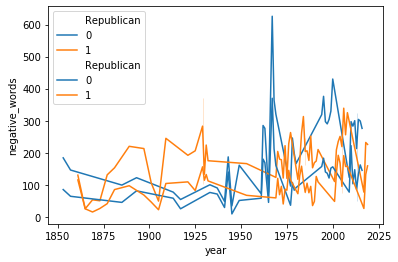

In [33]:
# plotting positive and negative words against each other 
sentiment = sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2)
sentiment = sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

## Positive and negative words ratio

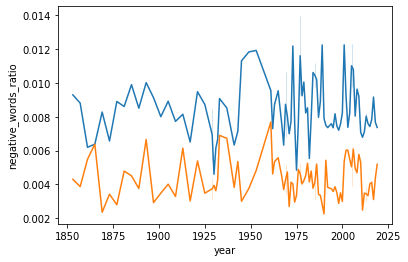

In [34]:
# plotting positive and negative words ratios against each other 
sentiment_r = sns.lineplot(x="year",y="positive_words_ratio", data=df2)
sentiment_r = sns.lineplot(x="year",y="negative_words_ratio", data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

In [35]:
average=sum(len(word) for word in words) /len(words)
average 



4845.945652173913

In [57]:
words.head()

type(words)
words[6]
len(words)
length = len(words)
a = list(range(0,length))
a

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91]

In [68]:
count=[]

def main(words):
    
    wordCount=0
    letterCount=0
    
    length = len(words)
    a = list(range(0,length))
    
    
    for i in a: 
        for word in words[i]:
            import time
            time.sleep(1)
            letterCount=letterCount+len(word)
            wordCount=wordCount+1
            mean = letterCount/wordCount
            count.append(mean)
            print(mean)
    return count



In [69]:
main(words)

print(count)

5.0
6.0
4.333333333333333
4.0
4.0
4.833333333333333
4.285714285714286
4.625
4.333333333333333
4.7
4.363636363636363
4.25
4.3076923076923075
4.285714285714286
4.133333333333334
4.0625
4.176470588235294
4.277777777777778
4.105263157894737
4.05
3.9523809523809526
4.045454545454546
4.260869565217392
4.125
4.04
4.038461538461538
4.148148148148148
4.071428571428571
3.9655172413793105
4.033333333333333
3.967741935483871
4.125
4.2727272727272725


KeyboardInterrupt: 